In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from mpl_toolkits.basemap import Basemap

In [2]:
data = ascii.read('/Users/yaolun/Google Drive/UT-Austin/YKC_shirt/ykc_visit.txt')

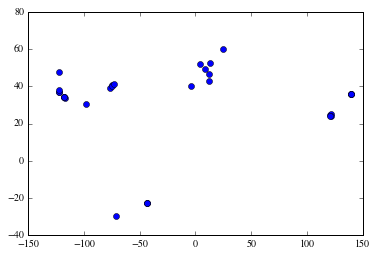

In [75]:
plt.plot(data['Longitude'], data['Latitude'], 'o')

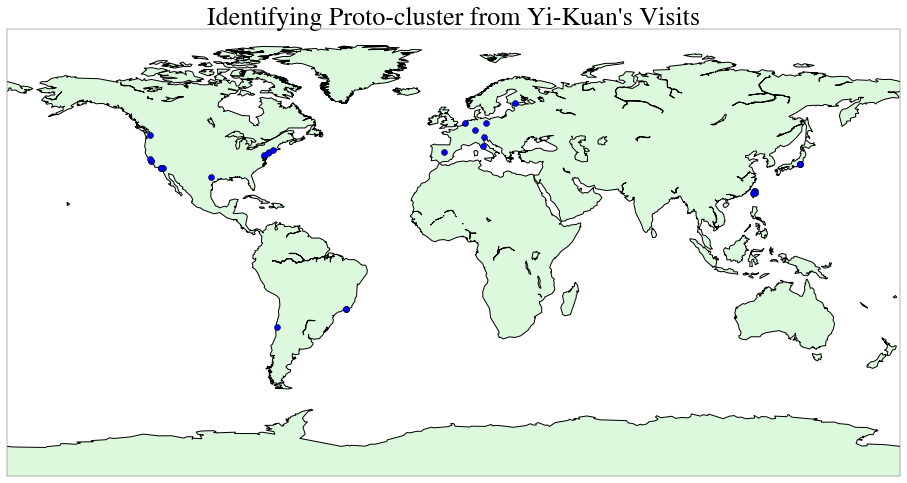

In [118]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcoastlines()
m.fillcontinents(color='LightGreen',lake_color='None', alpha=0.3)
# draw parallels and meridians.
# m.drawparallels(np.arange(-90.,91.,30.))
# m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(linewidth=0.3)

lats, lons = np.meshgrid(data['Latitude'], data['Longitude'])
x, y = m(data['Longitude'], data['Latitude'])
m.plot(x,y, 'o')

ax.set_title("Identifying Proto-cluster from Yi-Kuan's Visits", fontsize=26)


## Make Gaussian

In [47]:
def gauss2d(x, y, center, sigmax, sigmay=None):
    x_cen, y_cen = center
    # sigmax needs to be in pixel coordinates
    if sigmay == None:
        sigmay = sigmax
    return 1/(2*np.pi*sigmax*sigmay) * np.exp( -((x-x_cen)**2/2./sigmax**2 + (y-y_cen)**2/2./sigmay**2) )

def gridding(gauss_beam, size):
    # gauss_beam is the FWHM of the Gaussian
    size_x, size_y = size
    grid_x, grid_y = np.meshgrid(np.linspace(0,size_y-1,size_y), np.linspace(0,size_x-1,size_x))
    grid_x = grid_x - (size_x-1)/2.
    grid_y = grid_y - (size_y-1)/2.
    grid_gauss2d = gauss2d(grid_x, grid_y, sigmax=gauss_beam)
    
    return (grid_x, grid_y, grid_gauss2d)

In [137]:
size_x = np.linspace(-90, 90, 181)
size_y = np.linspace(-180, 180, 361)

grid_x, grid_y = np.meshgrid(size_x, size_y)

cluster_map = np.zeros_like(grid_x)
for i in range(len(data)):
    cluster_map += gauss2d(grid_x, grid_y, (data['Latitude'][i], data['Longitude'][i]), 10.)

## Add the effect of job offers

In [138]:
job = {'Latitude':[39.3327456,35.7126775], 'Longitude':[-76.6233388,139.76199]}

for i in range(len(job)):
    cluster_map += gauss2d(grid_x, grid_y, (job['Latitude'][i], job['Longitude'][i]), 10.)*6

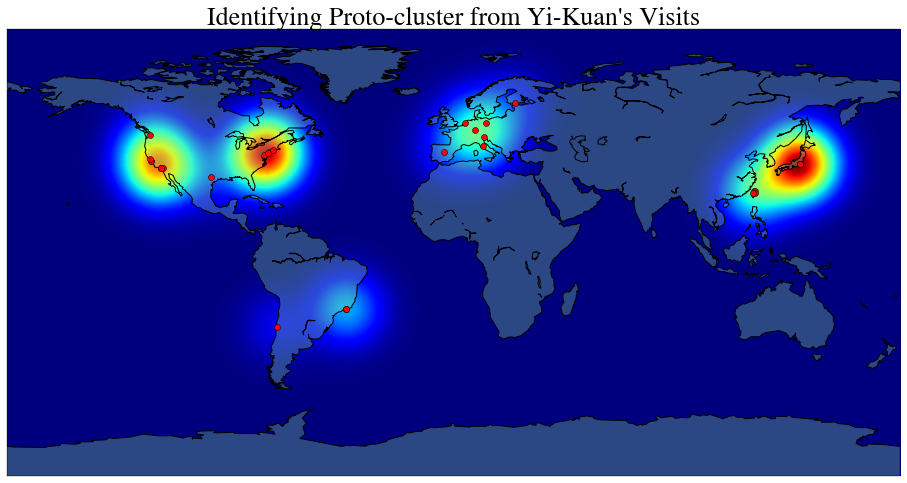

In [139]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcoastlines()
m.fillcontinents(color='LightGreen',lake_color='None', alpha=0.3)
# draw parallels and meridians.
# m.drawparallels(np.arange(-90.,91.,30.))
# m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(linewidth=0.3)

m.imshow(cluster_map.T, alpha=1, cmap=plt.cm.jet)

lats, lons = np.meshgrid(data['Latitude'], data['Longitude'])
x, y = m(data['Longitude'], data['Latitude'])
m.plot(x,y, 'o', color='r')

ax.set_title("Identifying Proto-cluster from Yi-Kuan's Visits", fontsize=26)

fig.savefig('/Users/yaolun/Google Drive/UT-Austin/YKC_shirt/map_job.pdf', format='pdf', dpi=300, bbox_inches='tight')